In [1]:
import sys
sys.path.insert(0, '/tf/utils/')

In [2]:
from utils import performance
from evaluate import NoisyTargetEvaluator
import tensorflow.keras.backend as K
from keras.utils import custom_object_scope
import tensorflow as tf

In [3]:
base_shape_size = 8192
ws = 255
ol = 128

In [4]:
def weighted_msle(y_true, y_pred):
    # Define o peso para penalizar mais as subestimações
    w = 2.0

    # Evita valores negativos adicionando 1 antes de aplicar o log
    log_true = 20 * tf.math.log(y_true + 1)
    log_pred = 20 * tf.math.log(y_pred + 1)

    # Cálculo do erro
    error = log_true - log_pred

    # Aplica pesos diferentes para superestimação e subestimação
    weighted_error = tf.where(error > 0, w * error, error)

    # Retorna a média do erro logarítmico quadrado ponderado
    return tf.reduce_mean(tf.abs(weighted_error))

In [5]:
with custom_object_scope({'weighted_msle': weighted_msle}):
    eval = NoisyTargetEvaluator(
            base_shape_size,
            '/tf/Dados/Vozes/test/',
            '/tf/Dados/Ruido/test/',
            'DNS-loss-0.5181-epochs-20-2023-11-22_23-19-04.h5',
            'DNS'
        )

Loading Noise Files: 100%|██████████| 815/815 [00:02<00:00, 403.80it/s]
/tf/utils/sound.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  clean_sounds = [sound for sound in clean_sounds if sound != self.TOO_SHORT_ERROR]
/tf/utils/sound.py:74: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  noise_sounds = [sound for sound in noise_sounds if sound != self.TOO_SHORT_ERROR]


In [6]:
df_resultado = eval.evaluate(batch_num=1, module_only=True)

100%|██████████| 1/1 [00:11<00:00, 11.54s/it]

File saved to DNS-metrics_2023-11-23_00-00-41.xlsx


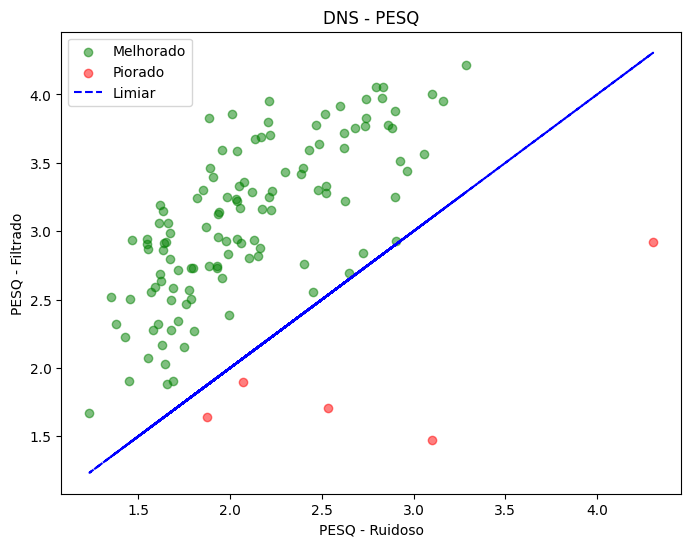

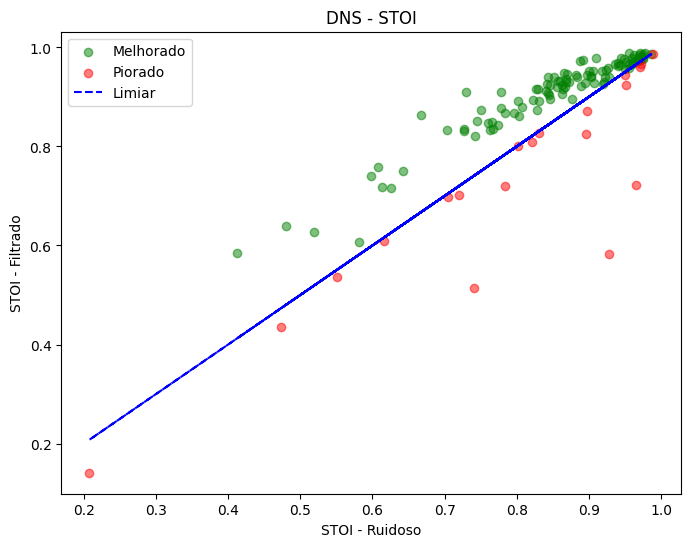

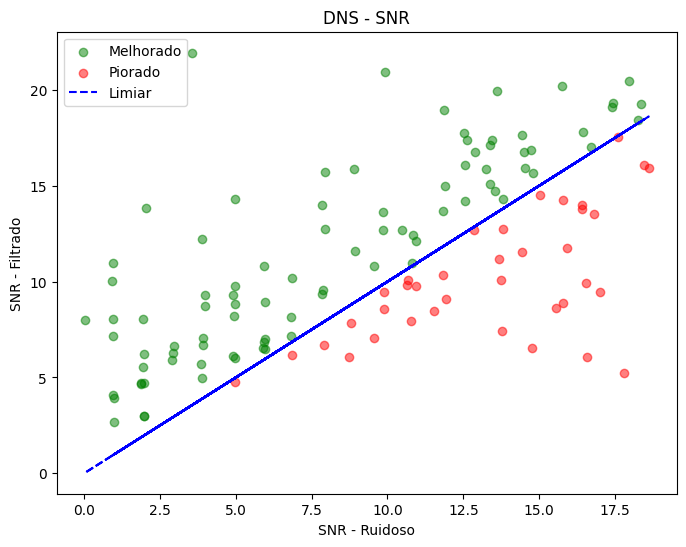

In [7]:
performance(df_resultado, 'DNS')